In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dc

## Numpy로 선형회귀 모델을 구현해봅시다!

선형회귀 모델은 경사하강법을 활용해서 훈련시킬 수 있습니다. 이번 실습에서는 Numpy로 선형회귀 모델을 구현하고 경사하강법으로 훈련시키는 과정에 대해서 알아볼까요?

#### 왜 이런 원시적인 방법으로 실습을 하나요?
사실 뒤에 배울 `pytorch`를 사용하면 지금 실습에 배울 내용들을 매우 간단하게 구현할 수 있습니다. 하지만 이렇게 기초부터 실습해보면 여러분들이 `pytorch`에서 일어나는 계산과정을 좀더 쉽게 따라가실거라고 생각해서 이 실습을 준비하게 되었습니다.

## 데이터 생성하기

`generate_samples` 함수를 활용해서 선형성을 가지는 데이터를 생성할 수 있습니다.
`generate_samples`는 아래와 같은 인자를 받습니다.

1. `n_samples` 몇개의 데이터 포인트를 생성할 것인가?
2. `w` : 선형식의 기울기
3. `b` : 선형식의 y 절편
4. `x_range` : x 데이터의 상/하한

In [2]:
def generate_samples(n_samples: int, 
                     w: float = 1.0, 
                     b: float = 0.5,
                     x_range=[-1.0,1.0]):
    
    xs = np.random.uniform(low=x_range[0], high=x_range[1], size=n_samples)
    ys = w * xs + b
    return xs, ys

In [3]:
w = 1.0
b = 0.5
xs, ys = generate_samples(30, w=w, b=b)

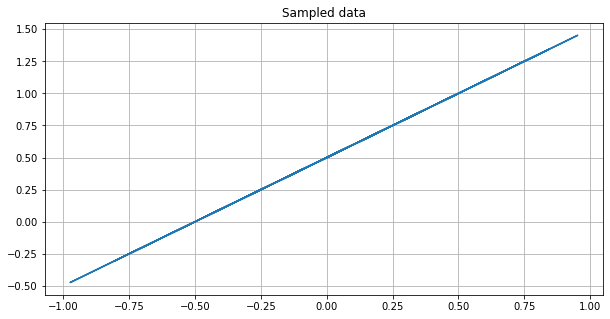

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.grid()
ax.plot(xs, ys)
ax.set_title("Sampled data")
plt.show()

## 선형식계산 및 훈련에 필요한 함수 정의하기

선형회귀식 $y=wx+b$과 sum-of-squares 오차함수 $\cal{L}$ 를 고려할때, 주어진 데이터에 대해 선형식의 파라미터 $w, b$ 의 적합도를 나타내는 수식은 다음과 같습니다.

$$\cal{L}(w,b)=\sum_{i=0}^{n}(y_i-(wx_i+b))^2$$
$i$는 데이터 인덱스.

이에 따른 각 파라미터의 편미분치는 다음의 수식과 같이 정의되었습니다. 

$$\frac{\partial \cal{L}(w,b)}{\partial w} = -2\sum_{i=0}^{n}(y_i-(wx_i+b))x_i$$
$$\frac{\partial \cal{L}(w,b)}{\partial b} = -2\sum_{i=0}^{n}(y_i-(wx_i+b))$$


In [5]:
def get_prediction(xs, w, b):
    return w * xs + b

def get_loss(xs, ys, w, b):
    ys_hat = get_prediction(xs, w, b) 
    return np.linalg.norm(ys - ys_hat, axis=-1)

def get_partial_w(xs, ys, w, b):
    partial_w = -2 * np.sum(((ys - (w*xs + b)) * xs), axis=0)
    return partial_w

def get_partial_b(xs, ys, w, b):
    partial_b = -2 * np.sum(((ys - (w*xs + b))), axis=0)
    return partial_b


## 경사하강법

경사하강법은 미분가능한 함수를 최적화 (최대값 및 최소값을 찾기) 하기위한 방법중에 하나였죠? 경사하강법은 다음과 같은 형태로 표현이 가능했습니다.
$$x_{k+1} \leftarrow x_k - \alpha \frac{\partial y}{\partial x_k}$$
위의 수식이 수렴할 때까지 (혹은 적당히 많이) 반복하는 과정을 통해서 함수를 최적화 할수 있습니다.

이제 그러면 이 수식을 구현한 파이썬 구현체를 살펴보도록 하죠.

In [6]:
def grad_descent(xs, ys, w_init, b_init, 
                 alpha: float, # Learning rate 
                 num_steps: float): # Graident update steps
    w_hat = w_init
    b_hat = b_init
    
    w_hats = [w_hat]
    b_hats = [b_hat]
    for i in range(num_steps):
        w_partial = get_partial_w(xs, ys, w_hat, b_hat)
        b_partial = get_partial_b(xs, ys, w_hat, b_hat)
        w_hat -= alpha * w_partial
        b_hat -= alpha * b_partial
        w_hats.append(w_hat)
        b_hats.append(b_hat)             
    return w_hats, b_hats

## 임의의 값으로 초기화된 파라미터 $w,b$를 경사하강법을 통해서 최적화하기!

In [7]:
w_init = float(np.random.randn(1))
b_init = float(np.random.randn(1))
alpha = 0.01
num_steps = 50

w_hats, b_hats = grad_descent(xs, ys, w_init, b_init,
                             alpha=alpha,
                             num_steps=num_steps)

## 최적화 결과를 살펴봅시다

In [8]:
ws = np.linspace(-3.0, 3.0, 100)
bs = np.linspace(-3.0, 3.0, 100)
ww, bb = np.meshgrid(ws, bs)
ww_flattend = ww.reshape(-1,1)
bb_flattend = bb.reshape(-1,1)

In [9]:
losses = get_loss(xs, ys, ww_flattend,bb_flattend)
losses = losses.reshape(-1,100)

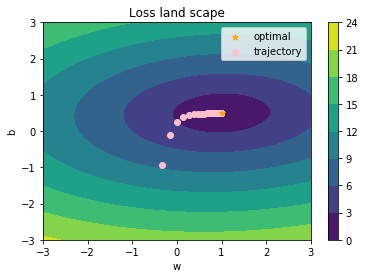

In [10]:
fig, ax=plt.subplots(1,1)
cp = ax.contourf(ww, bb, losses)
ax.scatter(w, b, 
           c='orange', marker='*', label='optimal', zorder=2)
ax.scatter(w_hats, b_hats, c='pink',
           marker='o', label='trajectory', zorder=1)
ax.set_title("Loss land scape")
ax.legend()
fig.colorbar(cp)
ax.set_xlabel('w')
ax.set_ylabel('b')
plt.show()

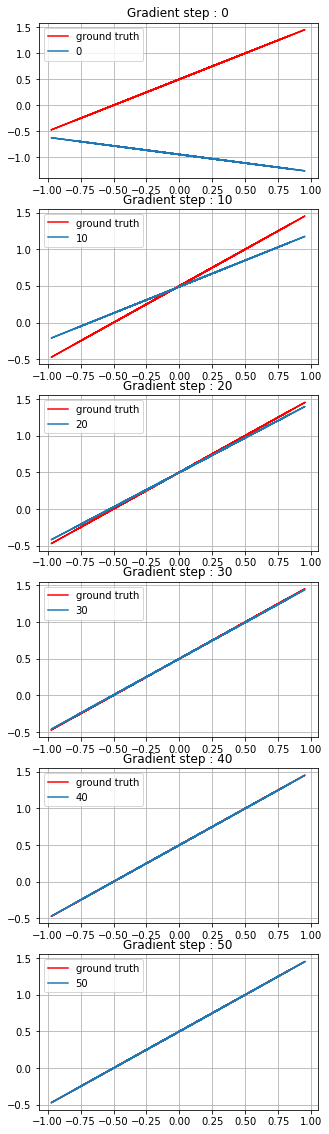

In [11]:
viz_every = 10

fig, ax = plt.subplots(len(w_hats[::viz_every]),1, figsize=(5, 2*viz_every))
for i, (w_hat, b_hat) in enumerate(zip(w_hats[::viz_every], b_hats[::viz_every])):
    grad_step = i * viz_every
    y_hat = get_prediction(xs, w_hat, b_hat)
    ax[i].grid()
    ax[i].plot(xs, ys, c='red', label='ground truth')
    ax[i].plot(xs, y_hat, label=grad_step)
    ax[i].legend()
    ax[i].set_title("Gradient step : {}".format(grad_step))